In [2]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
#from ipywidgets import interact_manual

In [3]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
x_train_image[0],y_train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [8]:
def plot_image(image): #定義plot_image函數，傳入image作為參數
    fig = plt.gcf() #設定顯示圖形的大小
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary') #傳入參數image、28*28像素的圖形，camp="binary"表示以黑白色顯示
    plt.show() #顯示圖片

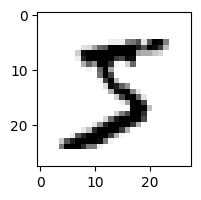

In [9]:
plot_image(x_train_image[0])

In [10]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [11]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [12]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

c:\Users\bruce_2nbsnuo\GitHub\poyu39\FCU-AI_NLP\venv-3_11_5\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [16]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=0)

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot, batch_size=1)
print('accuracy=',scores[1])

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 497us/step - accuracy: 0.9734 - loss: 0.0869
accuracy= 0.9761999845504761


In [23]:
for i in range(len(scores)):
    print('accuracy=',scores[i])

accuracy= 0.07757246494293213
accuracy= 0.9761999845504761


In [24]:
pre = model.predict(x_Test_normalize, batch_size=1)
prediction = np.argmax(pre, axis=1)
prediction

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 554us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_test_label

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)